In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:
ticker = 'VIST'

def get_ema():
    ema_values = []
    today = dt.date.today()
    for short_ema in range(2, 30):
        for long_ema in range(20, 50):
            if short_ema < long_ema:
                data = yf.download(tickers = ticker, start = '2010-1-1', end = f'{today.year}-{today.month}-{today.day}', auto_adjust = True)
                data[f'EMA_{short_ema}'] = data['Close'].ewm(span = short_ema).mean()
                data[f'EMA_{long_ema}'] = data['Close'].ewm(span = long_ema).mean()
                data['Ratio'] = (data[f'EMA_{short_ema}'] / data[f'EMA_{long_ema}']).shift()
                data['State'] = data.apply(lambda row: 'In' if row['Ratio'] >= 1 else 'Out', axis = 1)
                data['Yield'] = data['Close'].pct_change() + 1

                in_asset = data[data['State'] == 'In']
                cumulative_yield = (in_asset['Yield'].prod() - 1)
                start_date = in_asset.index[0].date()
                days = (today - start_date).days
                annual_yield = round((((1 + cumulative_yield) ** (365 / days)) - 1) * 100, 2)
                ema_values.append([short_ema, long_ema, annual_yield])

    return ema_values

ema_values = get_ema()
print(ema_values)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[[2, 20, 38.53], [2, 21, 32.24], [2, 22, 29.41], [2, 23, 28.28], [2, 24, 27.7], [2, 25, 21.87], [2, 26, 14.2], [2, 27, 12.8], [2, 28, 14.03], [2, 29, 15.67], [2, 30, 16.46], [2, 31, 14.65], [2, 32, 15.02], [2, 33, 17.96], [2, 34, 17.87], [2, 35, 14.51], [2, 36, 15.4], [2, 37, 12.26], [2, 38, 12.93], [2, 39, 12.08], [2, 40, 14.03], [2, 41, 7.63], [2, 42, 7.45], [2, 43, 4.52], [2, 44, 5.86], [2, 45, 6.58], [2, 46, 8.25], [2, 47, 8.87], [2, 48, 13.18], [2, 49, 12.09], [3, 20, 24.93], [3, 21, 26.18], [3, 22, 24.04], [3, 23, 22.46], [3, 24, 20.14], [3, 25, 21.46], [3, 26, 13.54], [3, 27, 14.06], [3, 28, 13.58], [3, 29, 13.32], [3, 30, 11.62], [3, 31, 10.17], [3, 32, 12.7], [3, 33, 6.64], [3, 34, 5.56], [3, 35, 5.87], [3, 36, 6.49], [3, 37, 3.48], [3, 38, 3.44], [3, 39, 1.13], [3, 40, 2.1], [3, 41, 1.84], [3, 42, 0.5], [3, 43, 2.43], [3, 44, 4.2], [3, 45, 3.68], [3, 46, 2.67], [3, 47, 4.26], [3, 48, 3.62], [3, 49, 7.84], [4, 20, 21.3], [4, 21, 20.84], [4, 22, 18.15], [4, 23, 14.1], [4, 24, 1

In [3]:
def create_ema_df(data):
    ema_columns = ['short_ema', 'long_ema', 'yield']
    ema_df = pd.DataFrame(data, columns = ema_columns)
    ema_df.sort_values(by = 'yield', ascending = False, inplace = True)
    ema_df = ema_df.iloc[:10, :]
    
    return ema_df

ema_df = create_ema_df(data = ema_values)
ema_df

,short_ema,long_ema,yield
677,25,28,49.94
699,26,27,49.94
720,26,48,49.75
654,24,29,48.38
698,25,49,47.82
630,23,30,47.54
631,23,31,47.31
649,23,49,47.27
612,22,38,46.89
629,23,29,46.86


[*********************100%%**********************]  1 of 1 completed
/var/folders/2h/zwjwlyfs0gbglx_vh0hy56g80000gn/T/ipykernel_4115/3650050930.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['Action'] = ['Buy' if (data['State'][i] == 'In') and (data['State'][i - 1] == 'Out') else 'Sell' if (data['State'][i] == 'Out') and (data['State'][i - 1] == 'In') else 'Pass' for i in range(len(data))]
/Users/gianmarcocaserta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/gianmarcocaserta/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

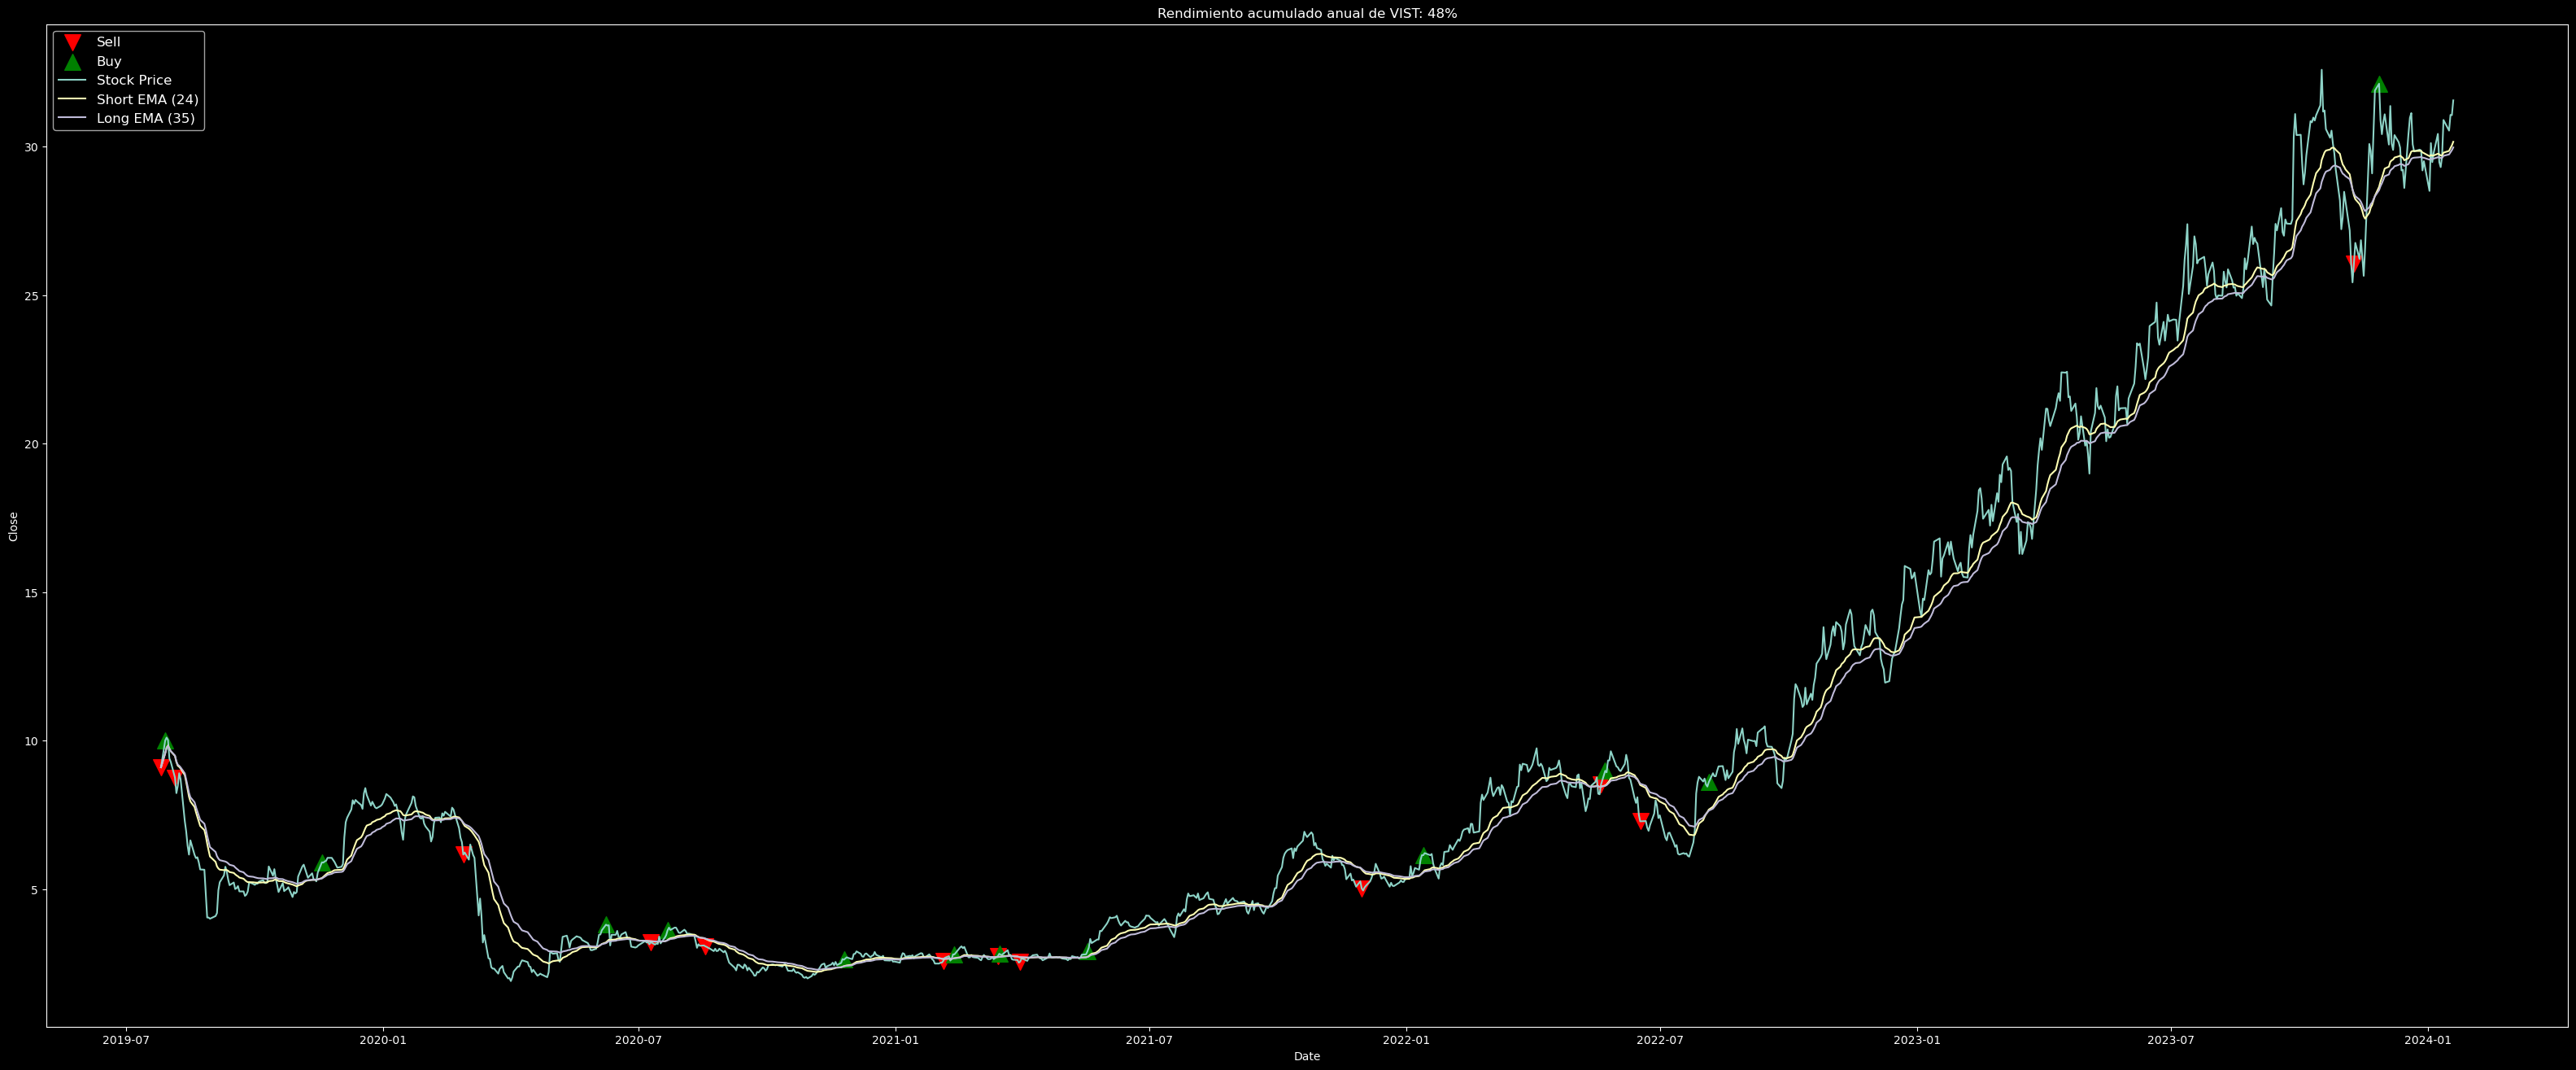

In [4]:
def mean_emas(data):
    today = dt.date.today()
    mean_short_ema = int(data['short_ema'].mean())
    mean_long_ema = int(data['long_ema'].mean())
    mean_yield = int(data['yield'].mean())
    data = yf.download(tickers = ticker, start = '2010-1-1', end = f'{today.year}-{today.month}-{today.day}', auto_adjust = True)
    data[f'EMA_{mean_short_ema}'] = data['Close'].ewm(span = mean_short_ema).mean()
    data[f'EMA_{mean_long_ema}'] = data['Close'].ewm(span = mean_long_ema).mean()
    data['Ratio'] = (data[f'EMA_{mean_short_ema}'] / data[f'EMA_{mean_long_ema}']).shift()
    data['State'] = data.apply(lambda row: 'In' if row['Ratio'] >= 1 else 'Out', axis = 1)
    data['Action'] = ['Buy' if (data['State'][i] == 'In') and (data['State'][i - 1] == 'Out') else 'Sell' if (data['State'][i] == 'Out') and (data['State'][i - 1] == 'In') else 'Pass' for i in range(len(data))]

    sell_signals = data[data['Action'] == 'Sell']
    buy_signals = data[data['Action'] == 'Buy']
    
    plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize = (40, 16))
    ax.scatter(x = sell_signals.index, y = sell_signals['Close'], color = 'red', marker = 'v', label = 'Sell', s = 200)
    ax.scatter(x = buy_signals.index, y = buy_signals['Close'], color = 'green', marker = '^', label = 'Buy', s = 200)
    sns.lineplot(data = data, x = data.index, y = data['Close'], label = 'Stock Price')
    sns.lineplot(data = data, x = data.index, y = data[f'EMA_{mean_short_ema}'], label = f'Short EMA ({mean_short_ema})')
    sns.lineplot(data = data, x = data.index, y = data[f'EMA_{mean_long_ema}'], label = f'Long EMA ({mean_long_ema})')
    plt.legend(fontsize = 'large')
    plt.title(f'Rendimiento acumulado anual de {ticker}: {mean_yield}%')
    plt.show()

    return data

mean_emas_data = mean_emas(data = ema_df)